## Deployment and Presentation

### Importing the relevant libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [7]:
data = pd.read_csv(r"C:\Users\hp\Documents\3Signet Internship\Task 6\cleaned_dataset.csv")
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


#### Splitting the Dataset int Train, Validation and Test set

In [108]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Split data into training (80%) and temp set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split temp set into validation (10%) and test (10%) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the sizes of each set
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (3539, 36)
Validation set: (442, 36)
Test set: (443, 36)


The dataset includes a training set (3,539 samples), a validation set (442 samples), and a test set (443 samples), all with 36 features, splitted in the ratio of 80 :10 :10. The training set is for model learning, the validation set is for tuning and performance assessment, and the test set evaluates final performance. This ensures similar class distributions and focuse on relevant features which are crucial for optimizing accuracy and avoiding overfitting.

#### Scaling the dataset using the MinMaxScaler

In [112]:
## this tends to scale the data to a fixed range, between 0 and 1. 
## we can do this by using the MinMaxScaler class from sklearn.preprocessing module.
from sklearn.preprocessing import MinMaxScaler

## To create an instance of MinMaxScaler
scaler = MinMaxScaler()

## Now fit the scaler on the training features
scaler.fit(X_train)

MinMaxScaler()

In [114]:
## Then transform the train and test features
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Key Benefits of MinMaxScaler
MinMaxScaler scales features to a specified range, typically [0, 1], which can enhance model performance by ensuring all features contribute equally. It preserves the relationships between data points, maintaining the original distribution's structure. However, it's important to note that MinMaxScaler can be sensitive to outliers, so alternative scaling methods may be needed in such cases.ases.


#### Training the Model

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the Random Forest model on the training data
rf_model.fit(X_train_scaled, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Make predictions using the test data
y_pred = rf_model.predict(X_test_scaled)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the Random Forest Model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
rf_result = metrics_calculator(y_test, y_pred, 'rf_model')

# Step 6: Display the results
rf_result

The accuracy of the Random Forest Model is 88.93905191873588 %


{'Model': 'rf_model',
 'Accuracy': 0.8893905191873589,
 'Precision': 0.9043478260869565,
 'Recall': 0.7323943661971831,
 'F1-Score': 0.8093385214007782}

#### Feature Importance

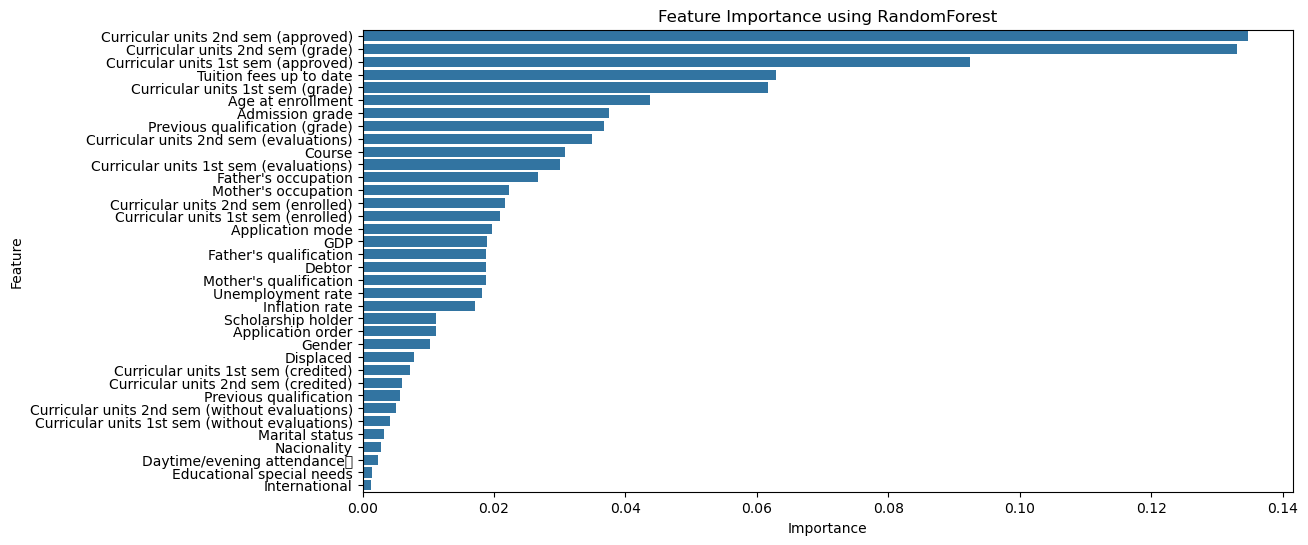

In [122]:
## To get the feature importance
feature_importance = rf_model.feature_importances_

## we create a new dataframe for the feature importance
importance_df = pd.DataFrame({'Feature':X.columns, 'Importance':feature_importance})

## To sort out by importance
importance_df = importance_df.sort_values(by='Importance',ascending=False)

## plotting the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance using RandomForest')
plt.show()

In [124]:
print(importance_df.head(9))

                                   Feature  Importance
30     Curricular units 2nd sem (approved)    0.134754
31        Curricular units 2nd sem (grade)    0.133054
24     Curricular units 1st sem (approved)    0.092362
16                 Tuition fees up to date    0.062846
25        Curricular units 1st sem (grade)    0.061629
19                       Age at enrollment    0.043782
12                         Admission grade    0.037563
6           Previous qualification (grade)    0.036786
29  Curricular units 2nd sem (evaluations)    0.034899


In [126]:
## to remove the columns that are not relevant,these are the list of the columns to keep
relevant_columns = ['Curricular units 2nd sem (approved)', 
                    'Curricular units 2nd sem (grade)', 
                    'Curricular units 1st sem (approved)', 
                    'Curricular units 1st sem (grade)', 
                    'Tuition fees up to date', 
                    'Age at enrollment', 
                    'Previous qualification (grade)', 
                    'Admission grade', 
                    'Curricular units 2nd sem (evaluations)', 
                    'Target']
df = data[relevant_columns]
df.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Age at enrollment,Previous qualification (grade),Admission grade,Curricular units 2nd sem (evaluations),Target
0,0,0.000000,0,0.000000,1,20,122.0,127.3,0,1
1,6,13.666667,6,14.000000,0,19,160.0,142.5,6,0
2,0,0.000000,0,0.000000,0,19,122.0,124.8,0,1
3,5,12.400000,6,13.428571,1,20,122.0,119.6,10,0
4,6,13.000000,5,12.333333,1,45,100.0,141.5,6,0


### Retraining The Model with the selected Features

#### Splitting into Train, Validation and Test Set

In [130]:
from sklearn.model_selection import train_test_split

# Selected features and target
selected_features = [
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (grade)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 
    'Tuition fees up to date', 
    'Age at enrollment', 
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 2nd sem (evaluations)'
]
target = 'Target'

# Separate features and target
X = data[selected_features]  # Features only include the selected ones
y = data[target]  # Target variable is 'Target'

# Split data into training (80%) and temp set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split temp set into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the sizes of each set
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Training set: (3539, 9)
Validation set: (442, 9)
Test set: (443, 9)


The provided data indicates the distribution of a dataset into three subsets:

- **Training set**: 3,539 samples, 9 features
- **Validation set**: 442 samples, 9 features
- **Test set**: 443 samples, 9 features

The training set is used to train the model, while the validation set helps tune the model's parameters and prevent overfitting. The test set is reserved for evaluating the model's final performance. This split ensures that the model is assessed on unseen data, providing a reliable measure of its generalization capabilities.


#### Scaling the Selected Features using MinMaxScaler

In [141]:
from sklearn.preprocessing import MinMaxScaler

# Selected features and target
selected_features = [
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (grade)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 
    'Tuition fees up to date', 
    'Age at enrollment', 
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 2nd sem (evaluations)'
]
target = 'Target'

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


#### Training and Evaluating the Model.

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Step 1: Select the relevant features and target column
selected_features = [
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (grade)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 
    'Tuition fees up to date', 
    'Age at enrollment', 
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 2nd sem (evaluations)'
]
target = 'Target'

# Assuming 'data' is your DataFrame containing these columns
X = data[selected_features]
y = data[target]

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming X_train_scaled and X_test_scaled are already scaled versions of X_train and X_test
# Otherwise, scale them here using MinMaxScaler or StandardScaler

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the selected 9 features
rf_model.fit(X_train_scaled, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Make predictions using the test data
y_pred = rf_model.predict(X_test_scaled)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the Random Forest Model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
rf_result = metrics_calculator(y_test, y_pred, 'rf_model')

# Step 6: Display the results
print(rf_result)


The accuracy of the Random Forest Model is 83.84180790960451 %
{'Model': 'rf_model', 'Accuracy': 0.8384180790960452, 'Precision': 0.8365758754863813, 'Recall': 0.680379746835443, 'F1-Score': 0.7504363001745201}


The Random Forest model achieved an accuracy of approximately **83.84%**, indicating a solid performance. Its precision is **0.84**, meaning that 84% of the positive predictions made by the model are correct. The recall is lower at **0.68**, suggesting that the model identifies 68% of actual positive instances. The F1-score, which balances precision and recall, stands at **0.75**, indicating a moderate trade-off between the two metrics. Overall, while the model performs well, there is potential for improvement, particularly in recall.


#### Hyperparameter tuning

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameters to tune for Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],               
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],            
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate performance using the custom metrics_calculator function
rf_result = metrics_calculator(y_test, y_pred, 'Random Forest')
print(rf_result)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validated accuracy:  0.8719991566155364
{'Model': 'Random Forest', 'Accuracy': 0.8406779661016949, 'Precision': 0.8404669260700389, 'Recall': 0.6835443037974683, 'F1-Score': 0.7539267015706806}


The model fitting process involved 3 folds for each of 81 candidates, totaling 243 fits. The best hyperparameters identified were: **max_depth** of 10, **min_samples_leaf** of 4, **min_samples_split** of 10, and **n_estimators** of 100. The best cross-validated accuracy achieved was approximately **87.20%**. In terms of performance metrics, the Random Forest model recorded an accuracy of **84.07%**, with a precision of **0.84**, indicating a high rate of correct positive predictions. The recall was **0.68**, showing that 68% of actual positives were identified, and the F1-score was **0.75**, reflecting a reasonable balance between precision and recall.


### Model Deployment Preparation

#### Serializing the final model

In [153]:
import pickle

# Save the best model obtained from GridSearchCV
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully as 'best_fr_model.pkl'")

Model saved successfully as 'best_fr_model.pkl'


In [168]:
# Load the saved model
with open('best_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Evaluate the loaded model's performance
loaded_model_result = metrics_calculator(y_test, y_pred_loaded, 'Loaded Random Forest Model')
print(loaded_model_result)

{'Model': 'Loaded Random Forest Model', 'Accuracy': 0.8406779661016949, 'Precision': 0.8404669260700389, 'Recall': 0.6835443037974683, 'F1-Score': 0.7539267015706806}


#### Deploying the model on the streamlit app

In [173]:
import os
import pickle
import streamlit as st

# Print the current working directory
print("Current working directory:", os.getcwd())

# Load the trained model
model_path = r"C:\Users\hp\Documents\3Signet Internship\Task 6\best_rf_model.pkl"

with open(model_path, 'rb') as file:
    classifier = pickle.load(file)

# Define mapping for 'Age at enrollment' and 'Tuition fees up to date'
age_enrollment_mapping = {
    "18-24": 0,
    "25-34": 1,
    "35-44": 2,
    "45+": 3
}

tuition_fees_mapping = {
    "Up to date": 0,
    "Not up to date": 1
}

# Defining the function to make predictions using the user input
@st.cache_data()
def prediction(curricular_units_2nd_approved, curricular_units_2nd_grade, curricular_units_1st_approved,
               curricular_units_1st_grade, tuition_fees_status, age_enrollment, admission_grade, 
               previous_qualification_grade, curricular_units_2nd_evaluations):

    # Map 'Age at enrollment' and 'Tuition fees up to date' to numerical values
    age_enrollment_numeric = age_enrollment_mapping[age_enrollment]
    tuition_fees_numeric = tuition_fees_mapping[tuition_fees_status]

    # Making Predictions
    prediction = classifier.predict([[curricular_units_2nd_approved, curricular_units_2nd_grade,
                                      curricular_units_1st_approved, curricular_units_1st_grade,
                                      tuition_fees_numeric, age_enrollment_numeric, admission_grade,
                                      previous_qualification_grade, curricular_units_2nd_evaluations]])

    if prediction == 0:
        pred = "Not Dropout"
    else:
        pred = "Dropout"

    return pred

# Main function to define the Streamlit web app
def main():
    # Front end elements of the web page
    html_temp = '''
    <div style='background-color: green; padding:13px'>
    <h1 style='color: black; text-align: center;'>Student Dropout Prediction ML App</h1>
    </div>
    '''

    # Display the front end aspect
    st.markdown(html_temp, unsafe_allow_html=True)

    # Input fields for user data
    curricular_units_2nd_approved = st.number_input("Curricular units 2nd sem (approved)")
    curricular_units_2nd_grade = st.number_input("Curricular units 2nd sem (grade)")
    curricular_units_1st_approved = st.number_input("Curricular units 1st sem (approved)")
    curricular_units_1st_grade = st.number_input("Curricular units 1st sem (grade)")
    tuition_fees_status = st.selectbox('Tuition fees up to date', tuple(tuition_fees_mapping.keys()))
    age_enrollment = st.selectbox('Age at enrollment', tuple(age_enrollment_mapping.keys()))
    admission_grade = st.number_input("Admission grade")
    previous_qualification_grade = st.number_input("Previous qualification (grade)")
    curricular_units_2nd_evaluations = st.number_input('Curricular units 2nd sem (evaluations)')

    result = ""

    # When 'Predict' is clicked, make prediction and display the result
    if st.button("Predict"):
        result = prediction(curricular_units_2nd_approved, curricular_units_2nd_grade, curricular_units_1st_approved,
                            curricular_units_1st_grade, tuition_fees_status, age_enrollment, admission_grade,
                            previous_qualification_grade, curricular_units_2nd_evaluations)
        st.success("Prediction: {}".format(result))

# Ensure proper entry point for the app
if __name__ == '__main__':
    main()


2024-10-21 03:03:56.988 No runtime found, using MemoryCacheStorageManager


Current working directory: C:\Users\hp\Documents\3Signet Internship\Task 6
